In [1]:
import mrigutilities as mu
import pandas as pd
import datetime,re
import kite.kite_trade as zkite
# import tradingDB_GUI as tdbg
# import kite.kite_account as ka
import numpy as np
# kite_object = ka.kite_account()

from kiteconnect import KiteConnect

expiry1 = mu.last_thursday_of_month(datetime.date.today())
expiry2 = mu.last_thursday_of_month(expiry1 + datetime.timedelta(days=30))
expiry3 = mu.last_thursday_of_month(expiry2 + datetime.timedelta(days=30))
expiry1,expiry2, expiry3
session = mu.getKiteSession()
today = datetime.datetime.now()
engine = mu.sql_engine()


connection active


In [2]:
# kite.invalidate_access_token()
ins = session.instruments()
ins= pd.DataFrame(ins)
ins

,instrument_token,exchange_token,tradingsymbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
0,260801030,1018754,EURINR24JUNFUT,EURINR,0.0,2024-06-26,0.0,0.0025,1,FUT,BCD-FUT,BCD
1,261799430,1022654,EURINR24JULFUT,EURINR,0.0,2024-07-29,0.0,0.0025,1,FUT,BCD-FUT,BCD
2,262676230,1026079,EURINR24AUGFUT,EURINR,0.0,2024-08-28,0.0,0.0025,1,FUT,BCD-FUT,BCD
3,263556614,1029518,EURINR24SEPFUT,EURINR,0.0,2024-09-26,0.0,0.0025,1,FUT,BCD-FUT,BCD
4,264741126,1034145,EURINR24OCTFUT,EURINR,0.0,2024-10-29,0.0,0.0025,1,FUT,BCD-FUT,BCD
...,...,...,...,...,...,...,...,...,...,...,...,...
100056,8150273,31837,SREEL,SREELEATHERS,0.0,,0.0,0.0500,1,EQ,NSE,NSE
100057,8183297,31966,863NHB29-N2,,0.0,,0.0,0.0100,1,EQ,NSE,NSE
100058,8183553,31967,863NHB34-N3,,0.0,,0.0,0.0100,1,EQ,NSE,NSE
100059,8184065,31969,888NHB29-N5,,0.0,,0.0,0.0100,1,EQ,NSE,NSE


In [3]:
ins[ins['name'] == 'TATAMOTORS']


,instrument_token,exchange_token,tradingsymbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
45170,16350978,63871,TATAMOTORS24JUNFUT,TATAMOTORS,0.0,2024-06-27,0.0,0.05,1425,FUT,NFO-FUT,NFO
45171,16346370,63853,TATAMOTORS24JULFUT,TATAMOTORS,0.0,2024-07-25,0.0,0.05,550,FUT,NFO-FUT,NFO
45172,14472194,56532,TATAMOTORS24AUGFUT,TATAMOTORS,0.0,2024-08-29,0.0,0.05,550,FUT,NFO-FUT,NFO
89586,31906818,124636,TATAMOTORS24JUN980CE,TATAMOTORS,0.0,2024-06-27,980.0,0.05,1425,CE,NFO-OPT,NFO
89587,31907842,124640,TATAMOTORS24JUN980PE,TATAMOTORS,0.0,2024-06-27,980.0,0.05,1425,PE,NFO-OPT,NFO
...,...,...,...,...,...,...,...,...,...,...,...,...
89779,36841986,143914,TATAMOTORS24AUG800PE,TATAMOTORS,0.0,2024-08-29,800.0,0.05,550,PE,NFO-OPT,NFO
89780,36759810,143593,TATAMOTORS24AUG780CE,TATAMOTORS,0.0,2024-08-29,780.0,0.05,550,CE,NFO-OPT,NFO
89781,36760578,143596,TATAMOTORS24AUG780PE,TATAMOTORS,0.0,2024-08-29,780.0,0.05,550,PE,NFO-OPT,NFO
89782,36750082,143555,TATAMOTORS24AUG760CE,TATAMOTORS,0.0,2024-08-29,760.0,0.05,550,CE,NFO-OPT,NFO


In [53]:
# ins[(ins['name'] == 'USDINR') & (ins['instrument_type'] == 'FUT') & (ins['exchange'] == 'CDS')].sort_values(by='expiry')
# ins[(ins['name'] == 'CRUDEOIL') & (ins['instrument_type'] == 'FUT') & (ins['exchange'] == 'MCX')].sort_values(by='expiry')
# ins[(ins['name'] == 'GOLD') & (ins['instrument_type'] == 'FUT') & (ins['exchange'] == 'MCX')].sort_values(by='expiry')
session.quote([884737,877057])
# session.ohlc('NSE:TATAPOWER')
tokens = ins[(ins['exchange'] == 'NFO') & (ins['name'] != '')][['instrument_token', 'tradingsymbol', 'name']]
tokens
# quotes = session.quote(tokens[0:500])

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /quote?i=884737&i=877057 HTTP/1.1" 200 None


,instrument_token,tradingsymbol,name
44567,12014082,NIFTY24MAYFUT,NIFTY
44568,8961026,NIFTY24JUNFUT,NIFTY
44569,8961794,NIFTY24JULFUT,NIFTY
44570,12012290,BANKNIFTY24MAYFUT,BANKNIFTY
44571,8965122,BANKNIFTY24JUNFUT,BANKNIFTY
...,...,...,...
84885,37554946,ZYDUSLIFE24JUL840PE,ZYDUSLIFE
84886,37554178,ZYDUSLIFE24JUL820CE,ZYDUSLIFE
84887,37554434,ZYDUSLIFE24JUL820PE,ZYDUSLIFE
84888,37553666,ZYDUSLIFE24JUL800CE,ZYDUSLIFE


In [48]:
quotes

{'100609': {'instrument_token': 100609,
  'timestamp': datetime.datetime(2024, 5, 21, 15, 56, 57),
  'last_trade_time': datetime.datetime(2024, 5, 21, 15, 54, 30),
  'last_price': 3.1,
  'last_quantity': 22,
  'buy_quantity': 0,
  'sell_quantity': 289986,
  'volume': 1675369,
  'average_price': 3.12,
  'oi': 0,
  'oi_day_high': 0,
  'oi_day_low': 0,
  'net_change': 0,
  'lower_circuit_limit': 3.1,
  'upper_circuit_limit': 3.4,
  'ohlc': {'open': 3.3, 'high': 3.3, 'low': 3.1, 'close': 3.25},
  'depth': {'buy': [{'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0}],
   'sell': [{'price': 3.1, 'quantity': 289986, 'orders': 5},
    {'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0},
    {'price': 0, 'quantity': 0, 'orders': 0}]}},
 '101121'

In [20]:
'''
['instrument_token', 'exchange_token', 'tradingsymbol', 'name',
       'last_price', 'expiry', 'strike', 'tick_size', 'lot_size',
       'instrument_type', 'segment', 'exchange']
name is underlying symbol if its a derivative
'''

# set(ins['name'])
ins['instrument_date'] = datetime.date.today()
engine.execute("delete from market_instruments where instrument_date < (CURRENT_DATE - interval '10 days')") ;
ins.to_sql('market_instruments',engine,index=False,if_exists='append')


644

In [4]:
import logging
from kiteconnect import KiteTicker

(apikey,access) = engine.execute("select api_key, access_token from auth where vendor='zerodha' and username='sbag'").fetchall()[0]

# print((apikey,access))

logging.basicConfig(level=logging.DEBUG)

# # Initialise
kws = KiteTicker(apikey, access)

def on_ticks(ws, ticks):
    # Callback to receive ticks.
    logging.debug("Ticks: {}".format(ticks))

def on_connect(ws, response):
    # Callback on successful connect.
    # Subscribe to a list of instrument_tokens (RELIANCE and ACC here).
    ws.subscribe([738561, 5633])

    # Set RELIANCE to tick in `full` mode.
    ws.set_mode(ws.MODE_LTP, [738561])

def on_close(ws, code, reason):
    # On connection close stop the main loop
    # Reconnection will not happen after executing `ws.stop()`
    ws.stop()

# # Assign the callbacks.
kws.on_ticks = on_ticks
kws.on_connect = on_connect
kws.on_close = on_close

# # Infinite loop on the main thread. Nothing after this will run.
# # You have to use the pre-defined callbacks to manage subscriptions.
kws.connect()

ReactorNotRestartable: 

In [28]:
def price(scrip):
    price = None
    yahoo_map = {'NIFTY':'^NSEI','BANKNIFTY':'^NSEBANK'}
    yahooid = scrip+'.NS'
    if (scrip == 'NIFTY' or scrip == 'BANKNIFTY'):
        yahooid = yahoo_map[scrip]
    if len(yahooid) > 0:
        if yahooid is not None:
            try:
                price = yf.download(yahooid,period='1d').Close.values[0]
            except:
                None
                
    return price


def num_pos(s):
    return re.search(r"\d", s).start()
col_map = {'Instrument':'instrument','Qty.':'qty','Avg.':'avg_price','LTP':'ltp','P&L':'pnl'}

def showAnalytics_live():
    def highlight(s):
        if s.l_s == '':
            return ['background-color: yellow'] * len(s)
        else:
            return ['background-color: white'] * len(s)

    volfile = 'vol.csv'
    vol_pd = pd.read_csv(volfile)
    vol_pd.drop(columns=['Date', 'Underlying Close Price (A)', 'Underlying Previous Day Close Price (B)',
                         'Underlying Log Returns (C) = LN(A/B)', 'Previous Day Underlying Volatility (D)'],
                inplace=True)
    vol_pd.set_index('Symbol', inplace=True)
    vol_pd.rename(columns={'Underlying Annualised Volatility (F) = E*Sqrt(365)': 'vol'}, inplace=True)
    hist_vol = vol_pd.to_dict()

    hist_vol = hist_vol['vol']

    hist_vol['NIFTY'] = 0.09
    hist_vol['BANKNIFTY'] = 0.14
    sql = 'select * from live_positions where snapshot = \
    (select snapshot from live_positions where pos_date = \
    (select pos_date from live_positions order by pos_date desc limit 1)\
    order by snapshot desc limit 1)'

    live_positions = kite_object.getPositions()
#     print(live_positions)

    positions = live_positions.loc[live_positions['exchange'] == 'NFO',
    ['tradingsymbol', 'instrument_token', 'product', 'quantity', 'average_price', 'last_price', 'pnl']]
    positions.rename(columns={'tradingsymbol':'Instrument',
                              'quantity' : 'qty',
                              'average_price' : 'avg_price',
                              'last_price':'ltp'},inplace=True)
    positions['type'] = positions['Instrument'].apply(lambda x: x[-2:])
    positions['type'] = positions['type'].apply(lambda x: 'FUT' if (x == 'UT') else x)
    positions['scrip'] = positions['Instrument'].apply(lambda x: x[:num_pos(x)])
    positions['strike'] = positions['Instrument'].apply(lambda x: x[num_pos(x) + 5:-2])
    positions['strike'] = positions['strike'].apply(lambda x: 0 if (x == 'F') else x)
    positions['strike'] = pd.to_numeric(positions['strike'],errors='ignore')
    positions['expiry'] = positions['Instrument'].apply(
        lambda x: datetime.datetime.strptime(x[num_pos(x):num_pos(x) + 5] + '27', '%y%b%d'))
    # positions.drop(columns=['Chg.', 'Product'], inplace=True)
    positions.rename(columns=col_map, inplace=True)
    positions['pos_date'] = today

    # positions = pd.read_sql(sql, engine)
    positions['l_s'] = positions[['type', 'qty']].apply(lambda x: 'Short' if (
                ((x['type'] == 'CE' or x['type'] == 'FUT') and x['qty'] < 0) or (
                    x['type'] == 'PE' and x['qty'] > 0)) else 'Long', axis=1)

    positions['orig_liab'] = positions[['type', 'qty', 'avg_price']].apply(
        lambda x: x['qty'] * x['avg_price'] if (x['qty'] < 0 and x['type'] != 'FUT') else 0, axis=1)
    positions['curr_liab'] = positions[['type', 'qty', 'ltp']].apply(
        lambda x: x['qty'] * x['ltp'] if (x['qty'] < 0 and x['type'] != 'FUT') else 0, axis=1)
    positions['wtd_strike'] = positions[['type', 'qty', 'strike','avg_price']].apply(
        lambda x: np.absolute(x['qty'] * x['strike']) if (x['type'] != 'FUT') else np.absolute(x['qty'] * x['avg_price']), axis=1)
    positions['abs_qty'] = np.absolute(positions['qty'])
    positions['max_profit'] = positions['orig_liab'].apply(lambda x: -x if (x < 0) else 'infinite')

    positions['breakeven'] = positions[['type', 'strike','avg_price']].apply(
        lambda x: (x['avg_price']+x['strike']) if (x['type'] != 'PE') else (x['strike'] - x['avg_price']), axis=1)

    positions['max_loss'] = positions[['type', 'qty', 'avg_price', 'orig_liab']].apply(
        lambda x: -x['qty'] * x['avg_price'] if (x['orig_liab'] == 0 and x['type'] != 'FUT') else 'infinite', axis=1)
    positions['spot'] = positions['scrip'].apply(lambda x: price(x))
    positions['histVol'] = positions['scrip'].apply(lambda x: float(hist_vol[x]))

    positions['impVol'] = -1
    positions['impVol'] = positions[['type', 'spot', 'strike', 'expiry', 'ltp']].apply(
        lambda x: mu.impVol(x['spot'], x['strike'], abs((x['expiry'] - today).days) / 365, x['ltp'],
                                       opt=x['type']), axis=1)
    positions['impVol'] = positions[['impVol', 'histVol']].apply(
        lambda x: x['histVol'] if (x['impVol'] == -1) else x['impVol'], axis=1)
    positions['delta (D)'] = positions[['type', 'qty', 'spot', 'strike', 'expiry', 'impVol']].apply(
        lambda x: x['qty'] * mu.bs_delta(x['spot'], x['strike'], abs((x['expiry'] - today).days) / 365,
                                                    x['impVol'], opt=x['type']), axis=1)
    positions['theta (T)'] = positions[['type', 'qty', 'spot', 'strike', 'expiry', 'impVol']].apply(
        lambda x: x['qty'] * mu.bs_theta(x['spot'], x['strike'], abs((x['expiry'] - today).days) / 365,
                                                    x['impVol'], opt=x['type']), axis=1)
    positions['T/D'] = positions[['qty', 'delta (D)', 'theta (T)']].apply(
        lambda x: abs(x['theta (T)'] / x['delta (D)']) if (x['delta (D)'] != 0 and x['qty'] < 0) else 0, axis=1)

    positions['underlying'] = positions[['scrip']].apply(lambda x: kite_object.getQuoteLive(x['scrip'])['last_price'],axis=1)
    positions['Intrinsic Value'] = positions[['strike','type','qty','underlying']].apply(
        lambda x : x['qty']* max((x['underlying'] - x['strike']),0) if (x['type'] == 'CE') else
        (x['qty']* max((x['strike'] - x['underlying']),0) if (x['type'] == 'PE') else 0),axis=1)
    positions['Time Value'] = positions[['type','pnl','Intrinsic Value']].apply(
        lambda x : (x['pnl'] - x['Intrinsic Value']) if (x['type'] != 'FUT') else 0 ,axis=1)

    positions['strike'] = positions['strike'].map('{:,.0f}'.format)

    df1 = positions.groupby(by=['scrip', 'instrument', 'l_s','strike'], as_index=False)[
        'qty', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','wtd_strike','abs_qty','breakeven'].sum().fillna(0).round()


    df2 = df1.groupby(by=['scrip', 'l_s'], as_index=False)[
        'qty', 'strike', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','wtd_strike','abs_qty','breakeven'].sum().fillna(
        0).round().assign(instrument='')

    df3 = df1.groupby(by=['scrip'], as_index=False)[
        'qty', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','wtd_strike','abs_qty','breakeven'].sum().fillna(
        0).round().assign(l_s='')


    df = (pd.concat([df1, df2, df3])
          .reindex(df1.columns, axis=1)
          .fillna('')
          .sort_values(['scrip', 'l_s','instrument'], ascending=True, ignore_index=True))

    scrips = set(list(df['scrip']))
    df['pivot_strike'] = 0
    for scrip in scrips:
        df.loc[((df['scrip'] == scrip) & (df['l_s'] == 'Long')),'pivot_strike'] = df[((df['scrip'] == scrip) & (df['l_s'] == 'Long'))]['wtd_strike'].sum()/df[((df['scrip'] == scrip) & (df['l_s'] == 'Long'))]['abs_qty'].sum()
        df.loc[((df['scrip'] == scrip) & (df['l_s'] == 'Short')),'pivot_strike'] = df[((df['scrip'] == scrip) & (df['l_s'] == 'Short'))]['wtd_strike'].sum()/df[((df['scrip'] == scrip) & (df['l_s'] == 'Short'))]['abs_qty'].sum()

    for scrip in df['scrip']:
        # sec = scrip
        # if scrip == 'NIFTY':
        #     sec = 'NIFTY 50'
        # elif scrip == 'BANKNIFTY':
        #     sec = 'NIFTY BANK'
        # print(scrip+'-------->'+sec)
        df.loc[((df['scrip'] == scrip) & (df['l_s'] == '')),'instrument'] = 'Last Price ---> '+str(kite_object.getQuoteLive(scrip)['last_price'])

    # df.set_index('scrip',inplace=True)
    # print(positions.groupby(by=['scrip']).sum()[['qty','orig_liab','curr_liab','delta','theta','pnl']])

    # df.loc[df['l_s'] == '',['strike']] = ''
    for col in ['qty', 'orig_liab', 'curr_liab', 'delta (D)', 'theta (T)', 'T/D', 'pnl','Intrinsic Value','Time Value','breakeven','pivot_strike']:
        df[col] = df[col].map('{:,.0f}'.format)
    df.loc[df['pivot_strike'] == '0','pivot_strike'] = ''
    df.loc[df['pivot_strike'] == '','breakeven'] = ''
    df.loc[df['instrument'] == '', 'breakeven'] = ''
    df.drop(columns=['wtd_strike','abs_qty'],axis=1,inplace=True)

    # print(df.columns)
    # df.rename(columns=ms.trade_display_analytics, inplace=True)

    return [positions, df]


In [30]:
a = showAnalytics_live()

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [44]:
to_date = datetime.date.today()
from_date = to_date - datetime.timedelta(days=70)
ins[(ins['name'] == 'USDINR') & (ins['instrument_type'] == 'FUT')].sort_values(by='expiry').head(2)
token = ins[(ins['name'] == 'USDINR') & (ins['instrument_type'] == 'FUT')].sort_values(by='expiry').head(1)['instrument_token'].values[0]
str(token)
# dt = session.historical_data(str(token),from_date,to_date,'day')
# dt

'325891'

In [55]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
assets = pytesseract.image_to_string(Image.open('tapo.png'))
liabilities = pytesseract.image_to_string(Image.open('tapo1.png'))
print(assets)
print(liabilities)

ASSETS

Non-Current Assets
(a) Property, Plant and Equipment 5a 295 20,778.35 20,874.79
(b)_ Right of Use Assets sb 299 2,921.24 2,833.74
(©) Capital Work-in-Progress 6 302 {1,272.56 965.15
(d)_ Intangible Assets 5c 301 22.46 37.43
(@) Financial Assets
@_ Investments 7 304 12,064.55 10,711.38
(i)_ Loans 9 310 2.68 453.17
Finance Lease Receivables 10 312 475.29 520.91
(iv) Other Financial Assets u 313 77.88 97.30
(f)_ Deferred Tax Assets (Net) 26 330 Nil 250.00
(g) Non-Current Tax Assets (Net) 12 314 610.60 338.00
(h) Other Non-Current Assets 1B 314 1,847.64 1,649.45
Total Non-Current Assets 40,073.25 38,731.32
Current Assets
(a)_ Inventories 14 315 2,457.95 2,292.33
(b) Financial Assets
@_ Investments 15 315 64.17 67.60
ii) Trade Receivables 8 308 1,904.34 1,026.65
(ii) Unbilled Revenue 66.56 58.86
(iv) Cash and Cash Equivalents 16 316 27447 57.36
(v)_Bank Balances other than (iv) above 7 317 21.45 21.19
(vi) Loans 9 310 Nil 1,328.48
(vii) Finance Lease Receivables 10 312 50.00 4261
(v

In [53]:
assets.split('\n')[3]

'(a) Property, Plant and Equipment 5a 295 20,778.35 20,874.79'

In [18]:
last_price = pd.DataFrame(session.quote('NSE:NIFTY 50'))['NSE:NIFTY 50']['last_price']
last_price
oc['itm x oi'] = oc[['strike', 'tradingsymbol','oi']].apply(lambda x: max(last_price - x['strike'],0)*x['oi'] if (x['tradingsymbol'][-2:] == 'CE') else max(x['strike']-last_price ,0)*x['oi'], axis=1)

# oc = oc.groupby(by=['strike'])
oc

,tradingsymbol,name,strike,oi,volume,last_price,expiry,itm x oi
0,NFO:NIFTY23SEP18300PE,NIFTY,18300.0,659350,0,4.55,2023-09-28,0.0
1,NFO:NIFTY23SEP18350CE,NIFTY,18350.0,700,0,1925.15,2023-09-28,1289645.0
2,NFO:NIFTY23SEP18350PE,NIFTY,18350.0,14300,0,4.4,2023-09-28,0.0
3,NFO:NIFTY23SEP18400CE,NIFTY,18400.0,39300,0,1841.35,2023-09-28,70439355.0
4,NFO:NIFTY23SEP18400PE,NIFTY,18400.0,340300,0,4.4,2023-09-28,0.0
...,...,...,...,...,...,...,...,...
90,NFO:NIFTY23SEP20550PE,NIFTY,20550.0,2850,0,333.25,2023-09-28,1019302.5
91,NFO:NIFTY23SEP20600CE,NIFTY,20600.0,1255400,0,21.55,2023-09-28,0.0
92,NFO:NIFTY23SEP20600PE,NIFTY,20600.0,35850,0,375,2023-09-28,14614252.5
93,NFO:NIFTY23SEP20650CE,NIFTY,20650.0,140400,0,17.8,2023-09-28,0.0


In [19]:
oc = oc.groupby(by=['strike'],as_index=False)['itm x oi'].sum().fillna(0).round()
oc

,strike,itm x oi
0,18300.0,0.000000e+00
1,18350.0,1.289645e+06
2,18400.0,7.043936e+07
3,18450.0,1.742350e+05
4,18500.0,5.000894e+08
5,18550.0,1.888702e+06
6,18600.0,3.009542e+07
7,18650.0,2.699112e+06
8,18700.0,5.484386e+07
9,18750.0,9.158922e+06


In [23]:
oc.sort_values(['itm x oi'],ascending=False).head(1)['strike'].values[0]

19000.0

In [2]:
import plotly.graph_objects as go
scrips = ['NIFTY 50','NIFTY BANK', 'INDIA VIX']
kitecodemap = pd.read_csv('kitensecodes.csv')
scrips = [kitecodemap[kitecodemap['tradingsymbol'] == scrip]['instrument_token'].values[0] for scrip in scrips]
to_date = datetime.date.today()
from_date = to_date - datetime.timedelta(days=30)
hist_data = []
for token in scrips:
    data = session.historical_data(token,from_date,to_date,interval='day',continuous=False)
    data = pd.DataFrame(data)
#     data['date'] = data['date'].apply(lambda x : datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S+05:30"))
#     data['date'] = data['date'].apply(lambda x : datetime.datetime.fromtimestamp(x))

    hist_data.append(data[data.columns[:-1]])
# hist_data[0]


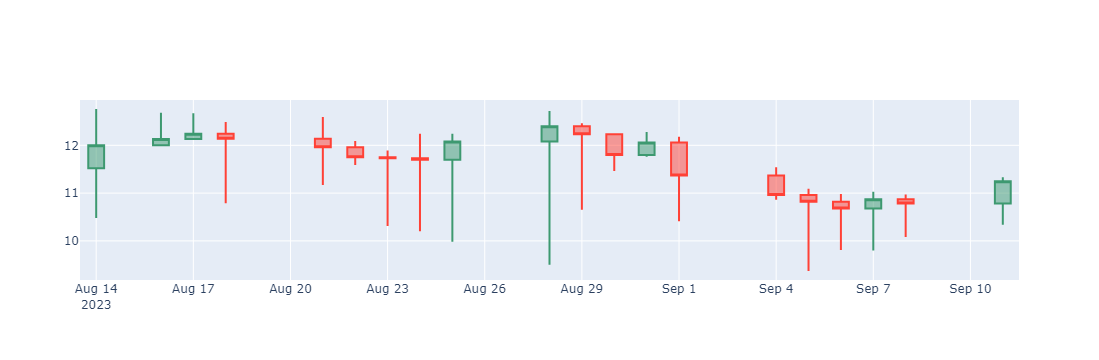

In [38]:
import tkinter as tk

win = tk.Tk()

fig = go.Figure(data=[go.Candlestick(x=hist_data[2]['date'],
                open=hist_data[2]['open'],
                high=hist_data[2]['high'],
                low=hist_data[2]['low'],
                close=hist_data[2]['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)


fig.show()

In [52]:
# import tradingDB as tdb
# tdbobj = tdb.tradingDB()
# grph = tdbobj.market_snapshot()

# ins = session.instruments(exchange='CDS')
# inspd = pd.DataFrame(ins)
# inspd[['tradingsymbol','instrument_token']].to_csv('kitemcxcodes.csv')

current_month = datetime.date.strftime(datetime.date.today(),'%b')
next_month = datetime.date.strftime(datetime.date.today() + datetime.timedelta(days=31),'%b') 
current_year = datetime.date.strftime(datetime.date.today(),'%y')
crude = 'GOLD'+current_year+next_month.upper()+'FUT'
usdinr = 'USDINR'+current_year+current_month.upper()+'FUT'

ins = session.instruments(exchange='MCX')
inspd = pd.DataFrame(ins)
# inspd[(inspd['tradingsymbol'].str.contains(u'GOLD*****FUT')) & (inspd['segment'] == 'MCX-FUT')].sort_values(by='expiry').head(1)
print(crude+'     '+str(inspd[inspd['tradingsymbol'] == crude]['instrument_token'].values[0]))


# session.quote('MCX:'+crude)

GOLD23OCTFUT     63590407


In [22]:
pd.DataFrame(session.historical_data(65260551,from_date,to_date,'day'))
pd.DataFrame(session.historical_data(2433027,from_date,to_date,'day'))

,date,open,high,low,close,volume
0,2023-08-14 00:00:00+05:30,83.0500,83.2625,83.0500,83.2200,596512
1,2023-08-17 00:00:00+05:30,83.1550,83.2850,83.0650,83.1950,450063
2,2023-08-18 00:00:00+05:30,83.1375,83.2500,83.1300,83.2175,246969
3,2023-08-21 00:00:00+05:30,83.2000,83.2800,83.1325,83.2325,297459
4,2023-08-22 00:00:00+05:30,83.1900,83.2050,83.0325,83.0925,397905
5,2023-08-23 00:00:00+05:30,83.1000,83.1200,82.7925,82.8175,854694
6,2023-08-24 00:00:00+05:30,82.7000,82.7025,82.4550,82.6600,1021798
7,2023-08-25 00:00:00+05:30,82.6875,82.8075,82.6875,82.7400,789945
8,2023-08-28 00:00:00+05:30,82.6625,82.7400,82.6100,82.7175,1503372
9,2023-08-29 00:00:00+05:30,82.7150,83.0075,82.5800,82.8375,2277563


In [32]:
pd.DataFrame(session.quote('NSE:NIFTY BANK'))['NSE:NIFTY BANK']

instrument_token                                               260105
last_price                                                    44539.1
net_change                                                      -39.2
ohlc                {'open': 44625.05, 'high': 44668.7, 'low': 444...
timestamp                                         2023-09-05 15:31:12
tradingsymbol                                              NIFTY BANK
Name: NSE:NIFTY BANK, dtype: object

In [3]:
variety = session.VARIETY_REGULAR
exchange= session.EXCHANGE_NFO
tradingsymbol='TATAPOWER23AUG250CE'
transaction_type=session.TRANSACTION_TYPE_SELL
quantity=3375
product= session.PRODUCT_NRML
order_type = session.ORDER_TYPE_LIMIT
price=15
validity=session.VALIDITY_DAY
disclosed_quantity=None
trigger_price=None
squareoff=None 
stoploss=None
trailing_stoploss=None
tag=None

margin = session.order_margins(variety,exchange, tradingsymbol, transaction_type, quantity, product, order_type, price,
                    validity, disclosed_quantity, trigger_price, squareoff=None, stoploss=None,
                    trailing_stoploss=None, tag=None)

margin

{'variety': 'regular', 'exchange': 'NFO', 'tradingsymbol': 'TATAPOWER23AUG250CE', 'transaction_type': 'SELL', 'quantity': 3375, 'product': 'NRML', 'order_type': 'LIMIT', 'price': 15, 'validity': 'DAY'}


{'status': 'error',
 'message': 'invalid json',
 'data': {},
 'error_type': 'InputException'}

In [10]:
qt = session.quote('NSE:LIQUIDBEES')
qt

{'NSE:LIQUIDBEES': {'instrument_token': 2817537,
  'timestamp': '2023-08-28 15:22:04',
  'last_trade_time': '2023-08-28 15:22:00',
  'last_price': 1000,
  'last_quantity': 20,
  'buy_quantity': 3963341,
  'sell_quantity': 3597881,
  'volume': 1484612,
  'average_price': 1000,
  'oi': 0,
  'oi_day_high': 0,
  'oi_day_low': 0,
  'net_change': 0,
  'lower_circuit_limit': 950,
  'upper_circuit_limit': 1050,
  'ohlc': {'open': 1000, 'high': 1000.01, 'low': 999.99, 'close': 1000},
  'depth': {'buy': [{'price': 1000, 'quantity': 41844, 'orders': 36},
    {'price': 999.99, 'quantity': 3852952, 'orders': 115},
    {'price': 999.98, 'quantity': 99, 'orders': 5},
    {'price': 999.97, 'quantity': 1, 'orders': 1},
    {'price': 999.95, 'quantity': 350, 'orders': 3}],
   'sell': [{'price': 1000.01, 'quantity': 3559001, 'orders': 98},
    {'price': 1000.02, 'quantity': 10000, 'orders': 1},
    {'price': 1000.03, 'quantity': 10, 'orders': 1},
    {'price': 1000.05, 'quantity': 16, 'orders': 1},
    {

In [176]:
scrip = 'TATAPOWER'
atm = mu.find_atm(614,5)
atm

615

In [177]:
inspd = pd.DataFrame(ins)
#inspd = inspd[(inspd['name'] == scrip) & (inspd['expiry'] == expiry) & (inspd['strike'] >= 18000) & (inspd['strike'] <= 20500) ][['tradingsymbol','strike']]
inspd = inspd[(inspd['name'] == scrip) & (inspd['expiry'] == expiry) & (inspd['strike'] > 0)][['tradingsymbol','strike']]
inspd['tradingsymbol'] = 'NFO:' + inspd['tradingsymbol']
inspd.set_index('tradingsymbol',inplace=True)
inspd
inslist = list(inspd.index)
inslist = inslist[int(len(inslist)/2-len(inslist)/4):int(len(inslist)/2+len(inslist)/4)]
inslist


,strike
tradingsymbol,
NFO:TATAPOWER23AUG177.5CE,177.5
NFO:TATAPOWER23AUG177.5PE,177.5
NFO:TATAPOWER23AUG180CE,180.0
NFO:TATAPOWER23AUG180PE,180.0
NFO:TATAPOWER23AUG182.5CE,182.5
...,...
NFO:TATAPOWER23AUG275PE,275.0
NFO:TATAPOWER23AUG277.5CE,277.5
NFO:TATAPOWER23AUG277.5PE,277.5


'NFO:NIFTY23AUG19200CE'

In [136]:
def kite_oc(df):
    def kitequote_to_oc(quote):
        oc = pd.DataFrame(quote)
        for key in quote.key:
            qt = quote[key]
            oc = pd.DataFrame(qt)
    for strike in set(list(df['strike'])):
        ce = 'NFO:'+ df[df['strike'] == strike]['tradingsymbol'].head(1).values[0]
        pe = 'NFO:'+ df[df['strike'] == strike]['tradingsymbol'].head(1).values[0]
        

In [1]:
oc = pd.DataFrame(qt).T
oc.index.name = 'tradingsymbol'
oc1 = oc.merge(inspd,on='tradingsymbol')[['strike','oi','volume','last_price']] 


NameError: name 'pd' is not defined

In [2]:
scrip = ['TATAPOWER']
expiry_list = [expiry1,expiry2,expiry3]
oc = mu.kite_OC(scrip,expiry_list)
oc.reset_index(inplace=True)

connection active


In [6]:
8 in [1,3,4,5]

False

In [6]:
oc.loc[oc['tradingsymbol'].str[-2:] == 'CE'].sort_values(by='oi',ascending=False).head(5).sort_values(by='strike')

,tradingsymbol,strike,oi,volume,last_price
36,NFO:AXISBANK23AUG900CE,900.0,106875,3750,72
2,NFO:AXISBANK23AUG1100CE,1100.0,376875,35625,0.15
4,NFO:AXISBANK23AUG1110CE,1110.0,95625,12500,0.05
6,NFO:AXISBANK23AUG1120CE,1120.0,73750,625,0.25
10,NFO:AXISBANK23AUG1140CE,1140.0,141250,1250,0.15


In [7]:
oc.loc[oc['tradingsymbol'].str[-2:] == 'PE'].sort_values(by='oi',ascending=False).head(5).sort_values(by='strike')

,tradingsymbol,strike,oi,volume,last_price
17,NFO:AXISBANK23AUG800PE,800.0,78125,2500,0.1
27,NFO:AXISBANK23AUG850PE,850.0,243750,21250,0.15
31,NFO:AXISBANK23AUG870PE,870.0,104375,2500,0.1
33,NFO:AXISBANK23AUG880PE,880.0,95625,3125,0.2
35,NFO:AXISBANK23AUG890PE,890.0,82500,6250,0.2


In [25]:
name = 'TATAPOWER'
oi_tree = oc[oc['name'] == name]
for expiry in sorted(set(list(oc['expiry'])),reverse=True):
    oi_tree['oi_ce'+str(expiry)] = oc.loc[(oc['tradingsymbol'].str[-2:] == 'CE') & (oc['expiry'] == expiry),'oi']/oc[(oc['tradingsymbol'].str[-2:] == 'CE') & (oc['expiry'] == expiry)]['oi'].sum()
    oi_tree['oi_pe'+str(expiry)] = -oc.loc[(oc['tradingsymbol'].str[-2:] == 'PE') & (oc['expiry'] == expiry),'oi']/oc[(oc['tradingsymbol'].str[-2:] == 'PE') & (oc['expiry'] == expiry)]['oi'].sum()
oi_tree.fillna(0,inplace=True)

In [4]:
oi_tree

,tradingsymbol,name,strike,oi,volume,last_price,expiry,oi_ce2023-10-26,oi_pe2023-10-26,oi_ce2023-09-28,oi_pe2023-09-28,oi_ce2023-08-31,oi_pe2023-08-31
0,NFO:TATAPOWER23AUG205CE,TATAPOWER,205.0,6750,0,42.40,2023-08-31,0.0,0.0,0.000000,0.000000,0.000402,0.000000
1,NFO:TATAPOWER23AUG205PE,TATAPOWER,205.0,766125,0,0.05,2023-08-31,0.0,0.0,0.000000,0.000000,0.000000,0.034619
2,NFO:TATAPOWER23AUG207.5CE,TATAPOWER,207.5,13500,0,39.90,2023-08-31,0.0,0.0,0.000000,0.000000,0.000804,0.000000
3,NFO:TATAPOWER23AUG207.5PE,TATAPOWER,207.5,37125,0,0.05,2023-08-31,0.0,0.0,0.000000,0.000000,0.000000,0.001678
4,NFO:TATAPOWER23AUG210CE,TATAPOWER,210.0,87750,47250,38.25,2023-08-31,0.0,0.0,0.000000,0.000000,0.005224,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NFO:TATAPOWER23SEP255CE,TATAPOWER,255.0,2170125,1188000,5.90,2023-09-28,0.0,0.0,0.096532,0.000000,0.000000,0.000000
123,NFO:TATAPOWER23SEP255PE,TATAPOWER,255.0,172125,20250,11.40,2023-09-28,0.0,0.0,0.000000,0.010343,0.000000,0.000000
124,NFO:TATAPOWER23SEP257.5CE,TATAPOWER,257.5,175500,405000,5.00,2023-09-28,0.0,0.0,0.007807,0.000000,0.000000,0.000000
125,NFO:TATAPOWER23SEP257.5PE,TATAPOWER,257.5,0,0,0.00,2023-09-28,0.0,0.0,0.000000,0.000000,0.000000,0.000000


2023-10-26
2023-08-31
2023-09-28


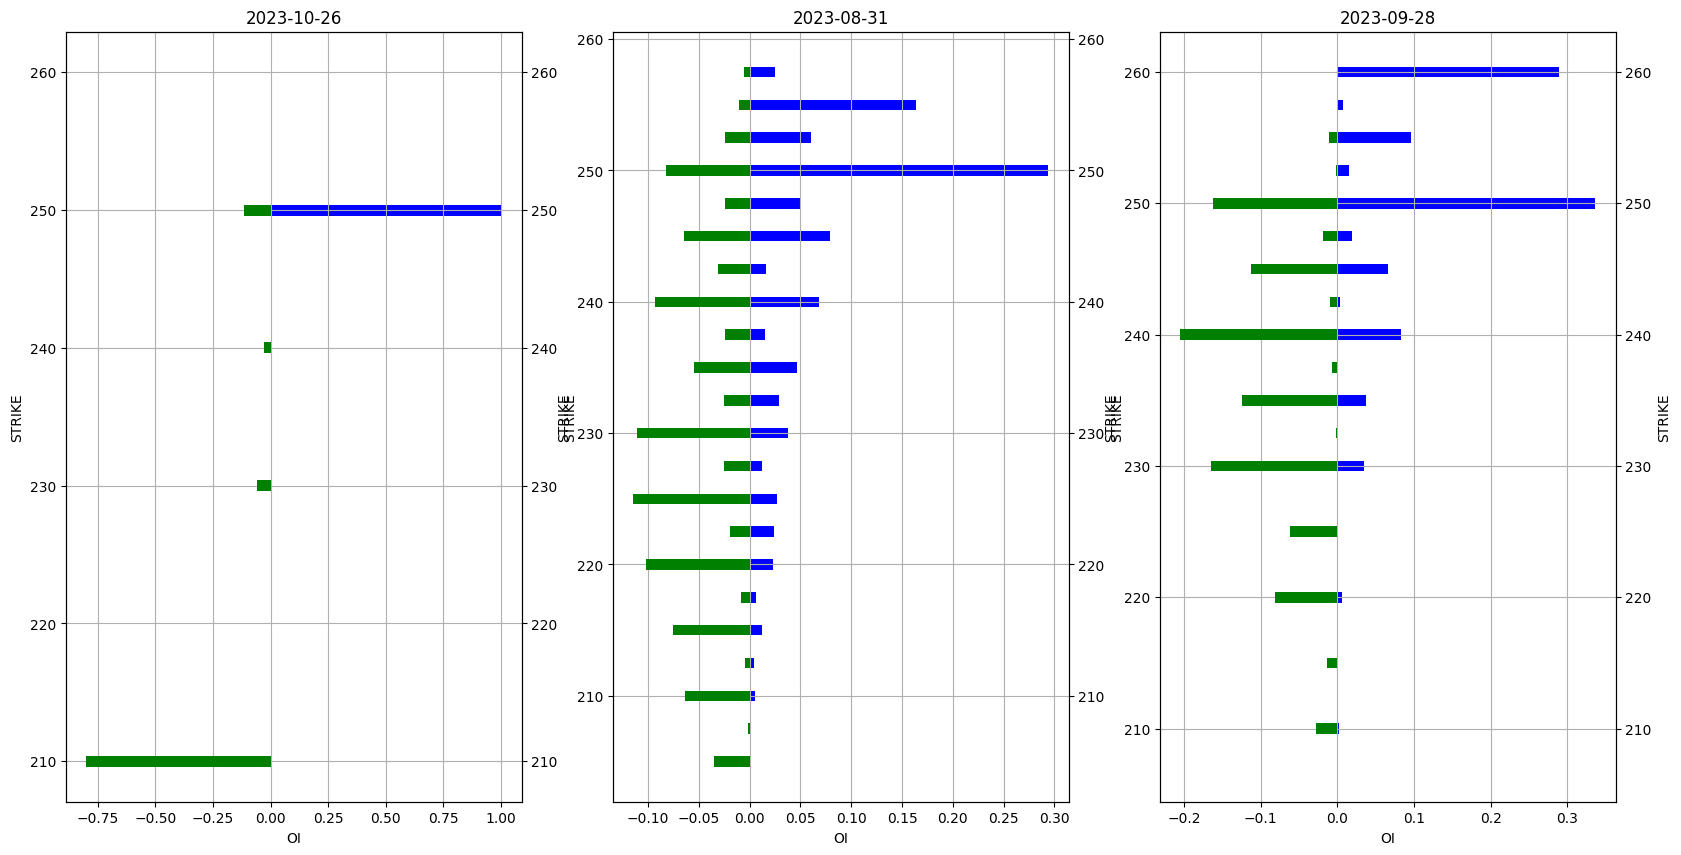

In [36]:
import matplotlib.pyplot as plt
oi_tree.sort_values(by=['expiry','strike'],ascending=[True,True],inplace=True)
fig, ax = plt.subplots(1,3,figsize=(20,10),squeeze=False) 

#oi_tree[['oi_ce','oi_pe']].plot(kind='barh')
i= 0
for exp in set(list(oc['expiry'])):
    print(exp)
    ax1 = ax[0,i]
    ax1.set_title(exp)
    ax1.grid()
    ax2 = ax[0,i].twinx()
    x_data = oi_tree[oi_tree['expiry'] == exp]['strike']
    y1_data = oi_tree[oi_tree['expiry'] == exp]['oi_ce'+str(exp)]
    y2_data = oi_tree[oi_tree['expiry'] == exp]['oi_pe'+str(exp)]
    ax1.set_xlabel('OI')
    ax1.set_ylabel('STRIKE')
    ax1.barh(x_data,y1_data,color='b')

    ax2.set_ylabel('STRIKE')
    ax2.barh(x_data,y2_data,color='g')

#     oi_tree[oi_tree['expiry'] == exp].plot(x='strike', y = 'oi_ce'+str(exp), ax = ax[0,i] ,title = exp, kind='barh',ylabel='OI') 
#     oi_tree[oi_tree['expiry'] == exp].plot(x='strike', y = 'oi_pe'+str(exp), ax = ax2,title = exp,secondary_y=True, kind='barh',color='g',ylabel='OI') 
#     ax2.set_ylabel('strike')
    i+=1
plt.show()